In [ ]:
import os

# Function to check for invalid label format
def check_invalid_labels(label_dirs):
    # Iterate through all the provided label directories
    for label_dir in label_dirs:
        for root, dirs, files in os.walk(label_dir):
            for file in files:
                # Only process .txt files (YOLO labels are typically .txt)
                if file.endswith(".txt"):
                    file_path = os.path.join(root, file)

                    # Open the label file to check for invalid formats
                    with open(file_path, "r") as f:
                        lines = f.readlines()

                        for line in lines:
                            # Split the line by spaces and check if it matches the YOLO format
                            parts = line.strip().split()

                            # Check if there are exactly 5 parts (class_id, center_x, center_y, width, height)
                            # and that the class_id is an integer and the others are floats
                            if len(parts) != 5:
                                print(f"Invalid line in file {file_path}: {line.strip()}")
                                break

                            # Check if the class_id is an integer and the rest are floats
                            try:
                                class_id = int(parts[0])  # class_id should be an integer
                                center_x = float(parts[1])  # center_x should be a float
                                center_y = float(parts[2])  # center_y should be a float
                                width = float(parts[3])     # width should be a float
                                height = float(parts[4])    # height should be a float
                            except ValueError:
                                print(f"Invalid line in file {file_path}: {line.strip()}")
                                break

# List of label directories
label_dirs = [
    r'C:\Users\micha\Documents\cvProject\train\labels',
    r'C:\Users\micha\Documents\cvProject\valid\labels',
    r'C:\Users\micha\Documents\cvProject\test\labels'
]

# Call the function to check for invalid label formats
check_invalid_labels(label_dirs)


Invalid line in file C:\Users\micha\Documents\cvProject\train\labels\04087f8e-Screenshot_2024-11-05_002637.txt: 0 0.08390715853982195 0.06267281105990781 0.8633338963013005 0.06267281105990781 0.8633338963013005 0.9824884792626724 0.08390715853982195 0.9824884792626724
Invalid line in file C:\Users\micha\Documents\cvProject\train\labels\09e16399-Screenshot_2024-11-05_002650.txt: 0 0.23141654978962134 0.06820276497695853 0.8405129232618714 0.06820276497695853 0.8405129232618714 0.9317972350230412 0.23141654978962134 0.9317972350230412
Invalid line in file C:\Users\micha\Documents\cvProject\train\labels\11bf568a-Screenshot_2024-11-05_002313.txt: 0 0.13372816316518013 0.08479262672811062 0.8320863485833433 0.08479262672811062 0.8320863485833433 0.9456221198156676 0.13372816316518013 0.9456221198156676
Invalid line in file C:\Users\micha\Documents\cvProject\train\labels\18a51f0e-Screenshot_2024-11-05_002148.txt: 0 0.18397486829077483 0.21751152073732716 0.697370704934665 0.2175115207373271

In [ ]:
import os

# Path to the label directories
label_dirs = [
    r'C:\Users\micha\Documents\cvProject\train\labels',
    r'C:\Users\micha\Documents\cvProject\valid\labels',
    # r'C:\Users\micha\Documents\cvProject\test\labels'
]

# Initialize counters for classes and bounding boxes
class_counts = {}
total_bounding_boxes = 0

# Iterate through each label directory
for label_dir in label_dirs:
    for filename in os.listdir(label_dir):
        file_path = os.path.join(label_dir, filename)

        # Only process .txt files (assuming labels are in text files)
        if file_path.endswith('.txt'):
            # Read the file and count bounding boxes and classes
            with open(file_path, 'r') as file:
                lines = file.readlines()

            # Process each line (bounding box) in the label file
            for line in lines:
                parts = line.strip().split()
                if len(parts) > 0:
                    class_index = int(parts[0])  # The first number is the class index

                    # Count the class occurrences
                    if class_index not in class_counts:
                        class_counts[class_index] = 0
                    class_counts[class_index] += 1

                    # Count total bounding boxes
                    total_bounding_boxes += 1

# Print out the results
print(f"Total Bounding Boxes: {total_bounding_boxes}")
print(f"Class Counts (Class Index: Count):")
for class_index, count in class_counts.items():
    print(f"Class {class_index}: {count} bounding boxes")


Total Bounding Boxes: 296
Class Counts (Class Index: Count):
Class 2: 133 bounding boxes
Class 0: 55 bounding boxes
Class 3: 72 bounding boxes
Class 1: 36 bounding boxes


In [ ]:
import os

# List of label directories
label_dirs = [
    r'C:\Users\micha\Documents\cvProject\train\labels',
    r'C:\Users\micha\Documents\cvProject\valid\labels',
    r'C:\Users\micha\Documents\cvProject\test\labels'
]

# Iterate through each label directory
for label_dir in label_dirs:
    for filename in os.listdir(label_dir):
        file_path = os.path.join(label_dir, filename)

        # Only process .txt files (assuming labels are in text files)
        if file_path.endswith('.txt'):
            # Read file lines
            with open(file_path, 'r') as file:
                lines = file.readlines()

            # Replace class index 4 with 3
            new_lines = []
            for line in lines:
                parts = line.strip().split()
                if parts[0] == '4':  # Check if the class index is 4
                    parts[0] = '3'   # Replace with class index 3
                new_lines.append(" ".join(parts) + "\n")

            # Write updated lines back to the file
            with open(file_path, 'w') as file:
                file.writelines(new_lines)

print("Label update complete!")


Label update complete!


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.27  Python-3.12.2 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)
Setup complete  (12 CPUs, 15.9 GB RAM, 542.0/893.7 GB disk)


In [ ]:
from ultralytics import YOLO
import torch

In [ ]:
model = YOLO('yolov8s.pt') # pretrained model
model.to("cuda")

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s

In [ ]:
model.train(data="C:\\Users\\micha\\Documents\\cvProject\\config.yaml",epochs=40,patience=0, batch=16, lr0=0.001,imgsz=640)

Ultralytics 8.3.27  Python-3.12.2 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:\Users\micha\Documents\cvProject\config.yaml, epochs=40, time=None, patience=0, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_

train: Scanning C:\Users\micha\Documents\cvProject\train\labels.cache... 195 images, 0 backgrounds, 0 corrupt: 100%|███

WARNING  Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 222. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning C:\Users\micha\Documents\cvProject\valid\labels.cache... 58 images, 0 backgrounds, 0 corrupt: 100%|██████


Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train2
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      4.42G     0.8707      1.126       1.21          9        640: 100%|██████████| 13/13 [00:03<00:00,  3.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74      0.456      0.555      0.471      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      4.09G     0.7918      1.023      1.163          9        640: 100%|██████████| 13/13 [00:02<00:00,  4.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74       0.39      0.497      0.412      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      4.14G     0.8102      1.096      1.166         10        640: 100%|██████████| 13/13 [00:02<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0


                   all         58         74      0.522       0.45      0.475      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      4.08G     0.8219      1.131      1.168          6        640: 100%|██████████| 13/13 [00:02<00:00,  4.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74      0.467      0.523       0.44      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      4.11G     0.8174      1.044      1.172          9        640: 100%|██████████| 13/13 [00:02<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74      0.521      0.489      0.542       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      3.94G     0.8835      1.132      1.238          7        640: 100%|██████████| 13/13 [00:02<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74      0.565      0.395      0.463      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      3.91G     0.8908      1.123      1.239          8        640: 100%|██████████| 13/13 [00:02<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74       0.51      0.373       0.49      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      4.11G     0.8533      1.072      1.192         10        640: 100%|██████████| 13/13 [00:02<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74      0.512      0.589      0.487      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      4.08G     0.8863      1.071      1.233          8        640: 100%|██████████| 13/13 [00:02<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74      0.499      0.527      0.495      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      4.13G     0.8714      1.132      1.226          9        640: 100%|██████████| 13/13 [00:02<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74      0.695      0.437      0.566      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      3.94G     0.9298      1.118      1.252          8        640: 100%|██████████| 13/13 [00:02<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74      0.421      0.576      0.513      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40       4.1G     0.8811      1.085      1.191          9        640: 100%|██████████| 13/13 [00:02<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74      0.473      0.377      0.422      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      4.08G      0.832      1.049      1.189         11        640: 100%|██████████| 13/13 [00:02<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0


                   all         58         74      0.433       0.36      0.395      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      4.11G     0.8231      1.071      1.201          4        640: 100%|██████████| 13/13 [00:02<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74      0.416       0.48      0.446      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      4.09G     0.8676      1.149      1.225          7        640: 100%|██████████| 13/13 [00:02<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74      0.482      0.493      0.443      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40       4.1G     0.7919      1.055      1.163          5        640: 100%|██████████| 13/13 [00:02<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74      0.393      0.519      0.467      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      3.92G      0.831       1.04      1.213         10        640: 100%|██████████| 13/13 [00:02<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74      0.398      0.555      0.373      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      4.12G     0.8517     0.9908      1.235         12        640: 100%|██████████| 13/13 [00:02<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74      0.455      0.491      0.337      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      3.94G     0.7941     0.9024      1.183          7        640: 100%|██████████| 13/13 [00:02<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74      0.481      0.418      0.404       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      3.93G     0.7613     0.9158      1.153          8        640: 100%|██████████| 13/13 [00:02<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74      0.442      0.455      0.479      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      4.09G     0.7851     0.9086      1.193          7        640: 100%|██████████| 13/13 [00:02<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74      0.402      0.415      0.421      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      3.95G     0.8052     0.8169       1.18          8        640: 100%|██████████| 13/13 [00:02<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74      0.389       0.45      0.383      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      3.93G      0.786     0.8784      1.177          6        640: 100%|██████████| 13/13 [00:02<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74      0.338      0.548       0.42      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40       4.1G      0.762     0.8653      1.157          9        640: 100%|██████████| 13/13 [00:02<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74      0.455      0.492      0.409      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      4.23G     0.7139     0.8061      1.101          9        640: 100%|██████████| 13/13 [00:02<00:00,  4.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74      0.572      0.526      0.564      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      4.14G     0.6608     0.7038       1.07         10        640: 100%|██████████| 13/13 [00:02<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74      0.735      0.498      0.599      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      3.94G     0.7092     0.7488      1.112          9        640: 100%|██████████| 13/13 [00:02<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0


                   all         58         74      0.717      0.561      0.588      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      3.94G     0.7639     0.7597      1.179          9        640: 100%|██████████| 13/13 [00:02<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74      0.485      0.595      0.576      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      4.23G     0.7058     0.7928      1.101          7        640: 100%|██████████| 13/13 [00:02<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74      0.653      0.542      0.634      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      4.11G     0.7476     0.7679       1.16          8        640: 100%|██████████| 13/13 [00:02<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74      0.698      0.685      0.678      0.563


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      3.94G      0.547     0.5836      1.041          4        640: 100%|██████████| 13/13 [00:03<00:00,  4.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74      0.691      0.655      0.671       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40       4.1G     0.4935     0.5299     0.9913          4        640: 100%|██████████| 13/13 [00:02<00:00,  4.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74      0.658      0.614      0.642      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      4.08G     0.4809     0.4562     0.9592          3        640: 100%|██████████| 13/13 [00:02<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74      0.558      0.649      0.642      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      4.13G     0.4822      0.428     0.9797          4        640: 100%|██████████| 13/13 [00:02<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74       0.68      0.615      0.665      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40       4.1G     0.4535     0.3798      0.949          3        640: 100%|██████████| 13/13 [00:02<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74      0.641      0.575      0.635      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40       4.1G     0.4678      0.403     0.9545          5        640: 100%|██████████| 13/13 [00:02<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74       0.58      0.527      0.608      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      4.23G      0.435     0.3501     0.9336          3        640: 100%|██████████| 13/13 [00:02<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74       0.54      0.658      0.633      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      4.11G     0.4105     0.3462     0.9472          3        640: 100%|██████████| 13/13 [00:02<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74      0.552      0.609      0.632      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40       4.1G     0.4404     0.3496     0.9732          4        640: 100%|██████████| 13/13 [00:02<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74       0.58      0.576      0.631      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      3.93G     0.3982     0.3477     0.9345          3        640: 100%|██████████| 13/13 [00:02<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         58         74      0.517      0.638      0.629      0.525



40 epochs completed in 0.071 hours.
Optimizer stripped from runs\detect\train2\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train2\weights\best.pt, 22.5MB

Validating runs\detect\train2\weights\best.pt...
Ultralytics 8.3.27  Python-3.12.2 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0


                   all         58         74      0.701      0.685      0.678      0.564
       Bent_Over_Squat          5          6       0.74       0.48      0.509      0.423
            Deep_Squat          8         10      0.592      0.582      0.443      0.347
            Good_Squat         36         41      0.772      0.854      0.877      0.699
         Shallow_Squat         15         17        0.7      0.824      0.883      0.785
Speed: 0.2ms preprocess, 3.2ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs\detect\train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000214DE2E9610>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
       

In [ ]:
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category
metrics.box.mp    # P
metrics.box.mr    # R

Ultralytics 8.3.27  Python-3.12.2 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)
Model summary (fused): 168 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning C:\Users\micha\Downloads\cvProject\valid\labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<0


                   all         60         77      0.478      0.672      0.517      0.445
       Bent_Over_Squat          5          6      0.252        0.5      0.221       0.19
            Deep_Squat          8         10      0.539        0.5      0.463      0.378
            Good_Squat         36         41      0.742      0.683      0.791      0.636
       Heels_Off_Squat          2          2      0.151          1      0.248      0.248
         Shallow_Squat         16         18      0.709      0.676       0.86      0.774
Speed: 0.7ms preprocess, 10.0ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs\detect\train102


0.6718221349995718

In [ ]:
model = YOLO("C:\\Users\\micha\\runs\\detect\\train\\weights\\best.pt")  # load a custom model

# Predict with the model with any image from internet?
# model.val(data="C:\\Users\\micha\\Documents\\cvProject\\config.yaml")


In [ ]:
results = model('https://bootylabinc.com/wp-content/uploads/2020/08/BL-WOW-Pinterest-Images-3-copy-3-1000x675.png', save=True)

100%|███████████████████████████████████████████████████████████████████████████████| 865k/865k [00:00<00:00, 2.22MB/s]


image 1/1 C:\Users\micha\BL-WOW-Pinterest-Images-3-copy-3-1000x675.png: 448x640 2 Bent_Over_Squats, 1 Deep_Squat, 54.0ms
Speed: 2.0ms preprocess, 54.0ms inference, 3.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict2


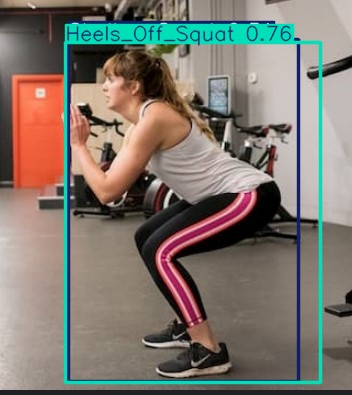

In [ ]:
# SHOW THE IMAGE STORED
%matplotlib inline
from PIL import Image

Image.open('C:\\Users\\micha\\runs\\detect\\predict9\\ok.jpg')